# Introduction to Image Processing


### Description

An image is represented as a matrix of pixels, where each pixel is a number from 0 to 255 (for a b/w image).

A colored image is composed of three matrices, for Red Green and Blue (RGB). 

In this project we will use `Pillow` (a fork of the Python Image Library) to open an image, which will be represented by a matrix in `numpy`: we can then manipulate in the way we want!\


### Note

This notebook uses [pillow](https://pillow.readthedocs.io/en/latest/).  It should already be installed in your environment, but if not you can install it:
```
! pip install Pillow
```

### References

* http://paulbourke.net/dataformats/bitmaps/

## Step 1: Open and Display

In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np

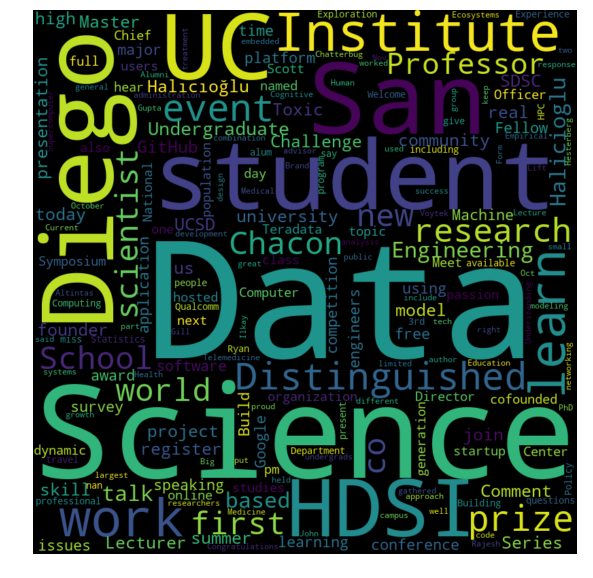

In [2]:
#let's open an image:
image = Image.open("data/HDSI.png")

# and let's visualize it:
display(image)

In [3]:
# that is great, but let's start from the beginning
image = Image.open("data/testBW.bmp")
display(image)

In [4]:
# this is too small, let's see its dimensions in pixels
image.size

(8, 4)

In [5]:
# let's just try to plot it larger

# this function prints a larger version of the image!
def printLargeImage(smallImage):
    maxsize = tuple([50*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize)
    display(largeImage)
    return

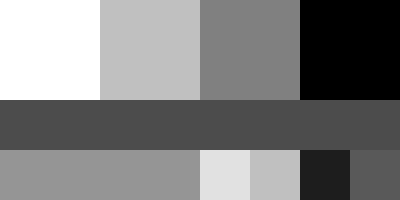

In [6]:
printLargeImage(image)

In [7]:
# now we want to modify the image! 

# first, let's read the image as a numpy array 
im_array = np.array(image)

im_array

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [ 76,  76,  76,  76,  76,  76,  76,  76],
       [149, 149, 149, 149, 225, 192,  29,  89]], dtype=uint8)

In [8]:
# this looks clear right? every pixel is a number (uint8) with max value 255 (WHITE) and min value 0 (BLACK)

# 1. let's get rid of the big black square on the top right, let's cloro it of light grey!

# *******************
# YOUR CODE HERE...
im_array_2 = ...

# 
image2 = Image.fromarray(im_array_2)
printLargeImage(image2)

# we can also save it if we want:
# image2.save('data/testBW.bmp')


AttributeError: 'ellipsis' object has no attribute '__array_interface__'

## Step 2: Image with colors

Ok we have seen how to deal with a small greyscale picture, what about colors?

In [9]:
# that is great, but let's start from the beginning
image = Image.open("data/test.bmp")
display(image)

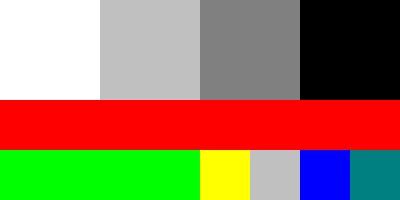

In [10]:
printLargeImage(image)

In [11]:
# let's look at how is the image in numpy
im_array = np.array(image)
im_array

array([[[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [192, 192, 192],
        [  0,   0, 255],
        [  0, 128, 128]]], dtype=uint8)

In [12]:
#umm, it has three dimensions now

#let's try to see the same format as before:
im_array[:,:,0]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 192,   0,   0]], dtype=uint8)

In [13]:
im_array[:,:,1]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 192,   0, 128]], dtype=uint8)

In [14]:
im_array[:,:,2]

array([[255, 255, 192, 192, 128, 128,   0,   0],
       [255, 255, 192, 192, 128, 128,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 192, 255, 128]], dtype=uint8)

In [15]:
# we have just visualized the three planes of the image! 
# these are referred to RGB:
# Red: im_array[:,:,0] 
# Green: im_array[:,:,1] 
# Blue: im_array[:,:,2] 

# 2. let's get read of the red line in the figure, 
# and let's make it a solid blue!

# *******************
# YOUR CODE HERE...  


## Step 3: Crop, rotate, change colors!

If you are interested, you can review [Pillow documentation](https://pillow.readthedocs.io/en/latest/).  There are lots of fun things like making thumbnails, rotating, filters, cropping, layering, etc. This is an easy tutorial with some code ready to be used: [Pillow Tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html).

Original:


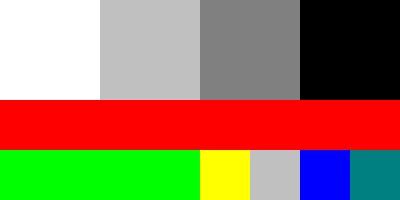

In [16]:
# as an example, let's try with our first small image

print('Original:')
printLargeImage(image)

Image cropped:


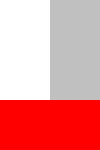

In [17]:
# crop the image:
box = (1, 0, 3, 3) # coordinates: (left, top, right, bottom)
image_cropped = image.crop(box)
print('Image cropped:')
printLargeImage(image_cropped)

In [18]:
import copy

Rotating the cropped:


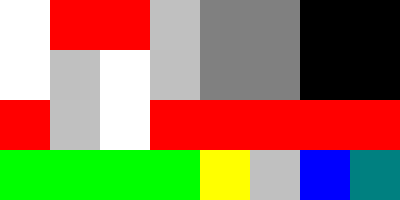

In [19]:
# rotate part of the image!
image_cropped = image_cropped.transpose(Image.ROTATE_180)
image2 = copy.deepcopy(image)
image2.paste(image_cropped, box)
print('Rotating the cropped:')
printLargeImage(image2)

Color messed up:


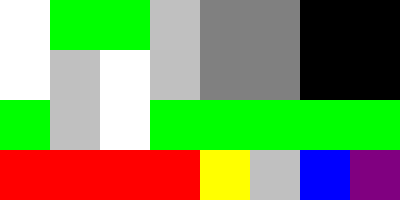

In [20]:
# let's mess up the image: I want to change the color intensity, swapping red and green
r, g, b = image2.split()
temp = Image.merge("RGB", (g, r, b))
print('Color messed up:')
printLargeImage(temp)

Original Image:


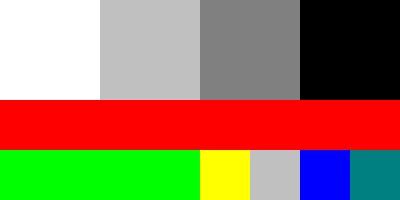

Image Dark:


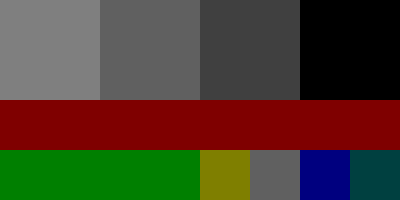

In [21]:
# the function before was not super useful... let's make the colors look darker!
im_array = np.array(image)

im_array_dark = im_array/2 # I make all colors much closer to black
im_array_dark = im_array_dark.astype('uint8') # each pixel still needs to be between 0 and 255 (PAY ATTENTION TO IT)

imageDark = Image.fromarray(im_array_dark)

print('Original Image:')
printLargeImage(image)

print('Image Dark:')
printLargeImage(imageDark)

## Step 4: Fix the Bear Image!

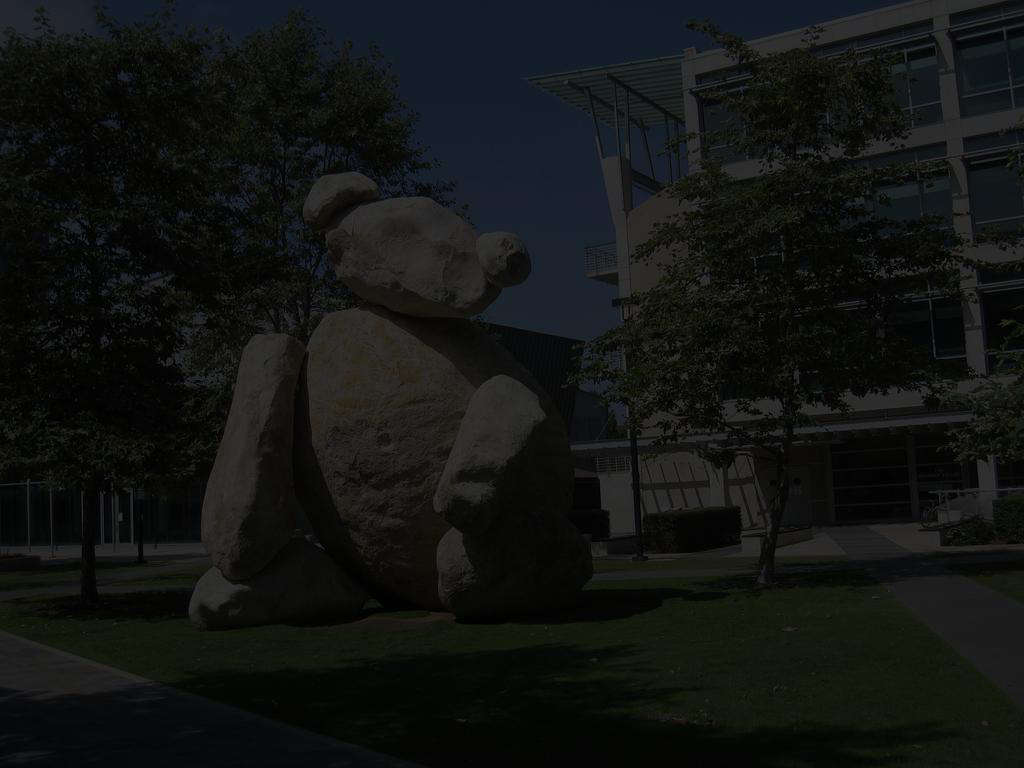

In [22]:
# Let's fix the bear image
bear = Image.open('data/bear.jpg')
display(bear)

In [23]:
# 4.1 We need to make the bear image look... good!

# use all the tools you learned before

# remember: each pixel MUST be of type 'uint8' with max value 255

# *******************
# YOUR CODE HERE...  



In [24]:
# 4.2 let's now apply a RED filter (make the image RED)

# *******************
# YOUR CODE HERE...  

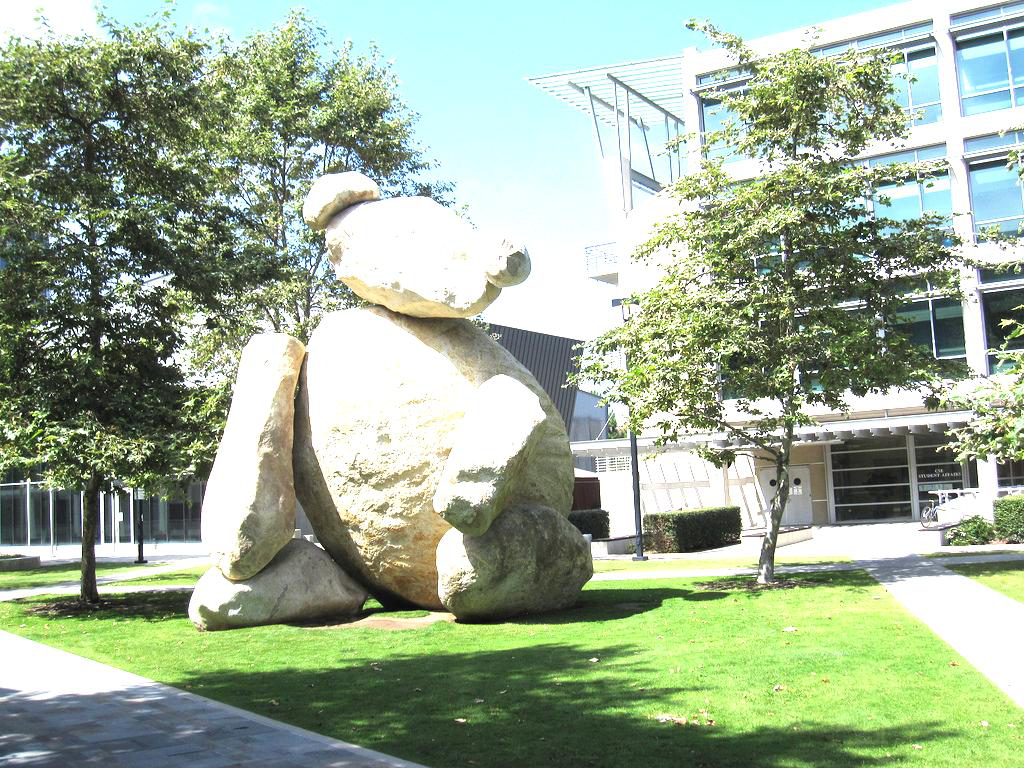

In [25]:
# 4.3 we have also a very bright image of the bear:

# Can we fix it?
bear = Image.open('data/bear_BRIGHT.jpg')
display(bear)